<a href="https://colab.research.google.com/github/Tungthanhlee/Linear-Regression/blob/master/ML_House_prices_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.animation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import io

# **a. Import data và vẽ đồ thị**

In [3]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.StringIO(uploaded['ames.csv'].decode('utf-8')))


Saving ames.csv to ames (1).csv


In [0]:
df[1:10]


,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


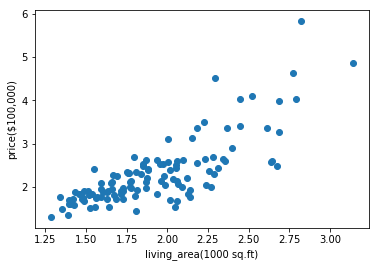

In [5]:
new_house = (df["MS.SubClass"] == 60) & (df["Yr.Sold"] == 2009)
living_area = df['Gr.Liv.Area'][new_house]/1000
price = df['SalePrice'][new_house]/100000

fig = plt.figure()
plt.scatter(living_area, price)
plt.xlabel('living_area(1000 sq.ft)')
plt.ylabel('price($100,000)')
plt.show()


# **b. Sử dụng least squares closed form để tính LR parameters theta**

In [6]:

living_area_vector = df["Gr.Liv.Area"][new_house].to_numpy().reshape(120,1)
bedrooms_vector = df["Bedroom.AbvGr"][new_house].to_numpy().reshape(120,1)

y = df["SalePrice"][new_house].to_numpy().reshape(120,1)

print(living_area_vector.shape)
print(bedrooms_vector.shape)
print(y.shape)



(120, 1)
(120, 1)
(120, 1)


In [7]:
one = np.ones((living_area_vector.shape[0], 1))
Xbar = np.concatenate((one, living_area_vector, bedrooms_vector), axis = 1)

print(Xbar.shape)
print(y.shape)
#print(np.around(Xbar,3))

(120, 3)
(120, 1)


In [0]:
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
theta = np.dot(np.linalg.inv(A), b)




In [128]:
#compute parameter using least square closed form
print(theta.T)


[[-21682.93585074    174.7137729  -25150.61763541]]


# **c. Sử dụng gradient descent để tính LR parameters theta**

In [0]:
#preprocessing
from sklearn import preprocessing
living_normalized = preprocessing.scale(living_area_vector)
bedroom_normalize = preprocessing.scale(bedrooms_vector)

y_normalized = preprocessing.scale(y)
Xbar_normalized = np.concatenate((one, living_norm, bedroom_norm), axis = 1)
#Xbar_normalized = preprocessing.scale(Xbar)
#print(preprocessing.scale(Xbar))
#print(Xbar_normalized)
print(Xbar_normalized)

In [0]:
#preprocessing 2
#df_norm = (df - df.mean()) / (df.max() - df.min())
living_n = (living_area_vector - living_area_vector.mean()) / (living_area_vector.max() - living_area_vector.min())
bedroom_n = (bedrooms_vector - bedrooms_vector.mean()) / (bedrooms_vector.max() - bedrooms_vector.min())

y_n = (y - y.mean()) / (y.max() - y.min())
Xbar_n = np.concatenate((one, living_n, bedroom_n), axis = 1)
print(Xbar_n)

In [0]:
#compute parameters using Gradient descent

#ham tinh gradient
def grad(theta):
    eta=1e-2
    Xbar = Xbar_n
    y = y_n
    return np.dot(eta*Xbar.T,np.dot(Xbar,theta)-y)

def cost(theta):
    Xbar = Xbar_n
    y = y_n
    N = Xbar.shape[0]
    return (1/N)*(np.linalg.norm(y-np.dot(Xbar,theta))**2)

In [0]:
#GD
def myGD(thera_init):
    theta = [theta_init]
    for it in range(1000):
        theta_new = theta[-1] - grad(theta[-1])
        if np.linalg.norm(grad(theta_new))/len(theta_new) < 1e-3:
            break
        theta.append(theta_new)
    return theta


In [131]:
theta_init = np.zeros((3,1))
w1 = myGD(theta_init)

print(w1[-1].T)
print(cost(w1[-1]))


[[-4.29344060e-17  6.07281799e-01 -2.56507358e-02]]
0.010668134653687706


# d. Sử dụng sklearn để tính LR parameters theta

In [126]:
#use sklearn
from sklearn.linear_model import LinearRegression


living_area_vector = df["Gr.Liv.Area"][new_house].to_numpy().reshape(120,1)
bedrooms_vector = df["Bedroom.AbvGr"][new_house].to_numpy().reshape(120,1)

y = df["SalePrice"][new_house].to_numpy().reshape(120,1)
one = np.ones((living_area_vector.shape[0], 1))
Xbar = np.concatenate((living_area_vector, bedrooms_vector), axis = 1)
#regr = linear_model.LinearRegression()
regr= LinearRegression().fit(Xbar, y)

coef_ = regr.coef_
intercept_= regr.intercept_
result = np.concatenate((intercept_,coef_), axis = None)
print(result)



[-21682.93585075    174.7137729  -25150.61763541]


**Kết quả model trùng khớp với kết quả khi sử dụng closed form**

closed form: [-21682.93585075    174.7137729  -25150.61763541] 

sk learn: [-21682.93585075    174.7137729  -25150.61763541]